In [2]:
import warnings
warnings.simplefilter(action='ignore')

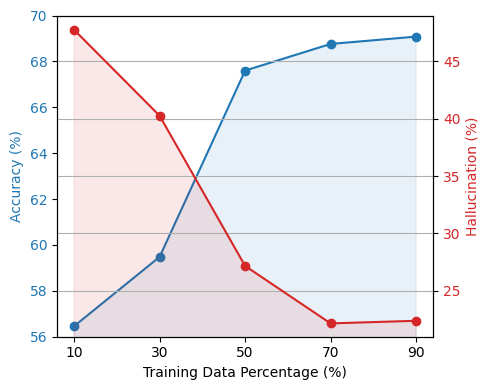

In [3]:
import matplotlib.pyplot as plt

percentages = [10, 30, 50, 70, 90]
acc = [56.46, 59.48, 67.60, 68.76, 69.08]
hallu = [47.75, 40.26, 27.17, 22.16, 22.39]

fig, ax1 = plt.subplots(figsize=(5, 4))
ax1.set_xlabel('Training Data Percentage (%)')
ax1.set_ylabel('Accuracy (%)', color='tab:blue', labelpad=4)
ax1.plot(percentages, acc, marker='o', color='tab:blue', label='Accuracy')
ax1.fill_between(percentages, acc, alpha=0.1, color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(percentages)
ax1.set_ylim(56, 70)

ax2 = ax1.twinx()
ax2.set_ylabel('Hallucination (%)', color='tab:red', labelpad=4)
ax2.plot(percentages, hallu, marker='o', color='tab:red', label='Hallucination')
ax2.fill_between(percentages, hallu, alpha=0.1, color='#d62728')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(21, 49)

fig.tight_layout()
plt.grid(True)
plt.savefig("figures/ablation_training_data.pdf", dpi=1600, bbox_inches='tight', format='pdf')
plt.show()

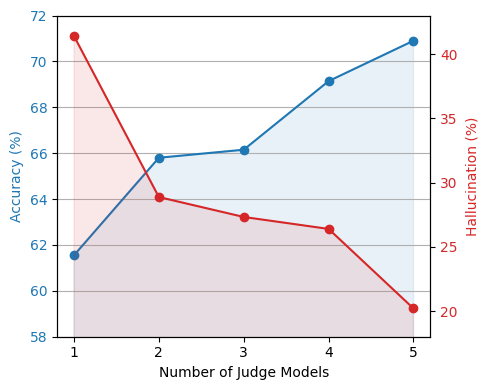

In [4]:
no_of_models = [1, 2, 3, 4, 5]
acc = [61.55, 65.80, 66.15, 69.14, 70.90]
hallu = [41.40, 28.87, 27.32, 26.39, 20.20]

fig, ax1 = plt.subplots(figsize=(5, 4))

ax1.set_xlabel('Number of Judge Models')
ax1.set_ylabel('Accuracy (%)', color='tab:blue', labelpad=4)
ax1.plot(no_of_models, acc, marker='o',
         color='#1f77b4', label='Accuracy', zorder=3)
ax1.fill_between(no_of_models, acc, alpha=0.1, color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_ylim(58, 72)

ax2 = ax1.twinx()
ax2.set_ylabel('Hallucination (%)', color='tab:red', labelpad=6)
ax2.plot(no_of_models, hallu, marker='o',
         color='#d62728', label='Hallucination', zorder=3)
ax2.fill_between(no_of_models, hallu, alpha=0.1, color='#d62728')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(18, 43)

# Set x axis to take integer values explicitly
ax1.set_xticks(no_of_models)

ax1.grid(True, axis='y')  # Horizontal grid only

fig.tight_layout()
plt.savefig("figures/ablation_no_models.pdf", dpi=1600, bbox_inches='tight', format='pdf')

plt.show()

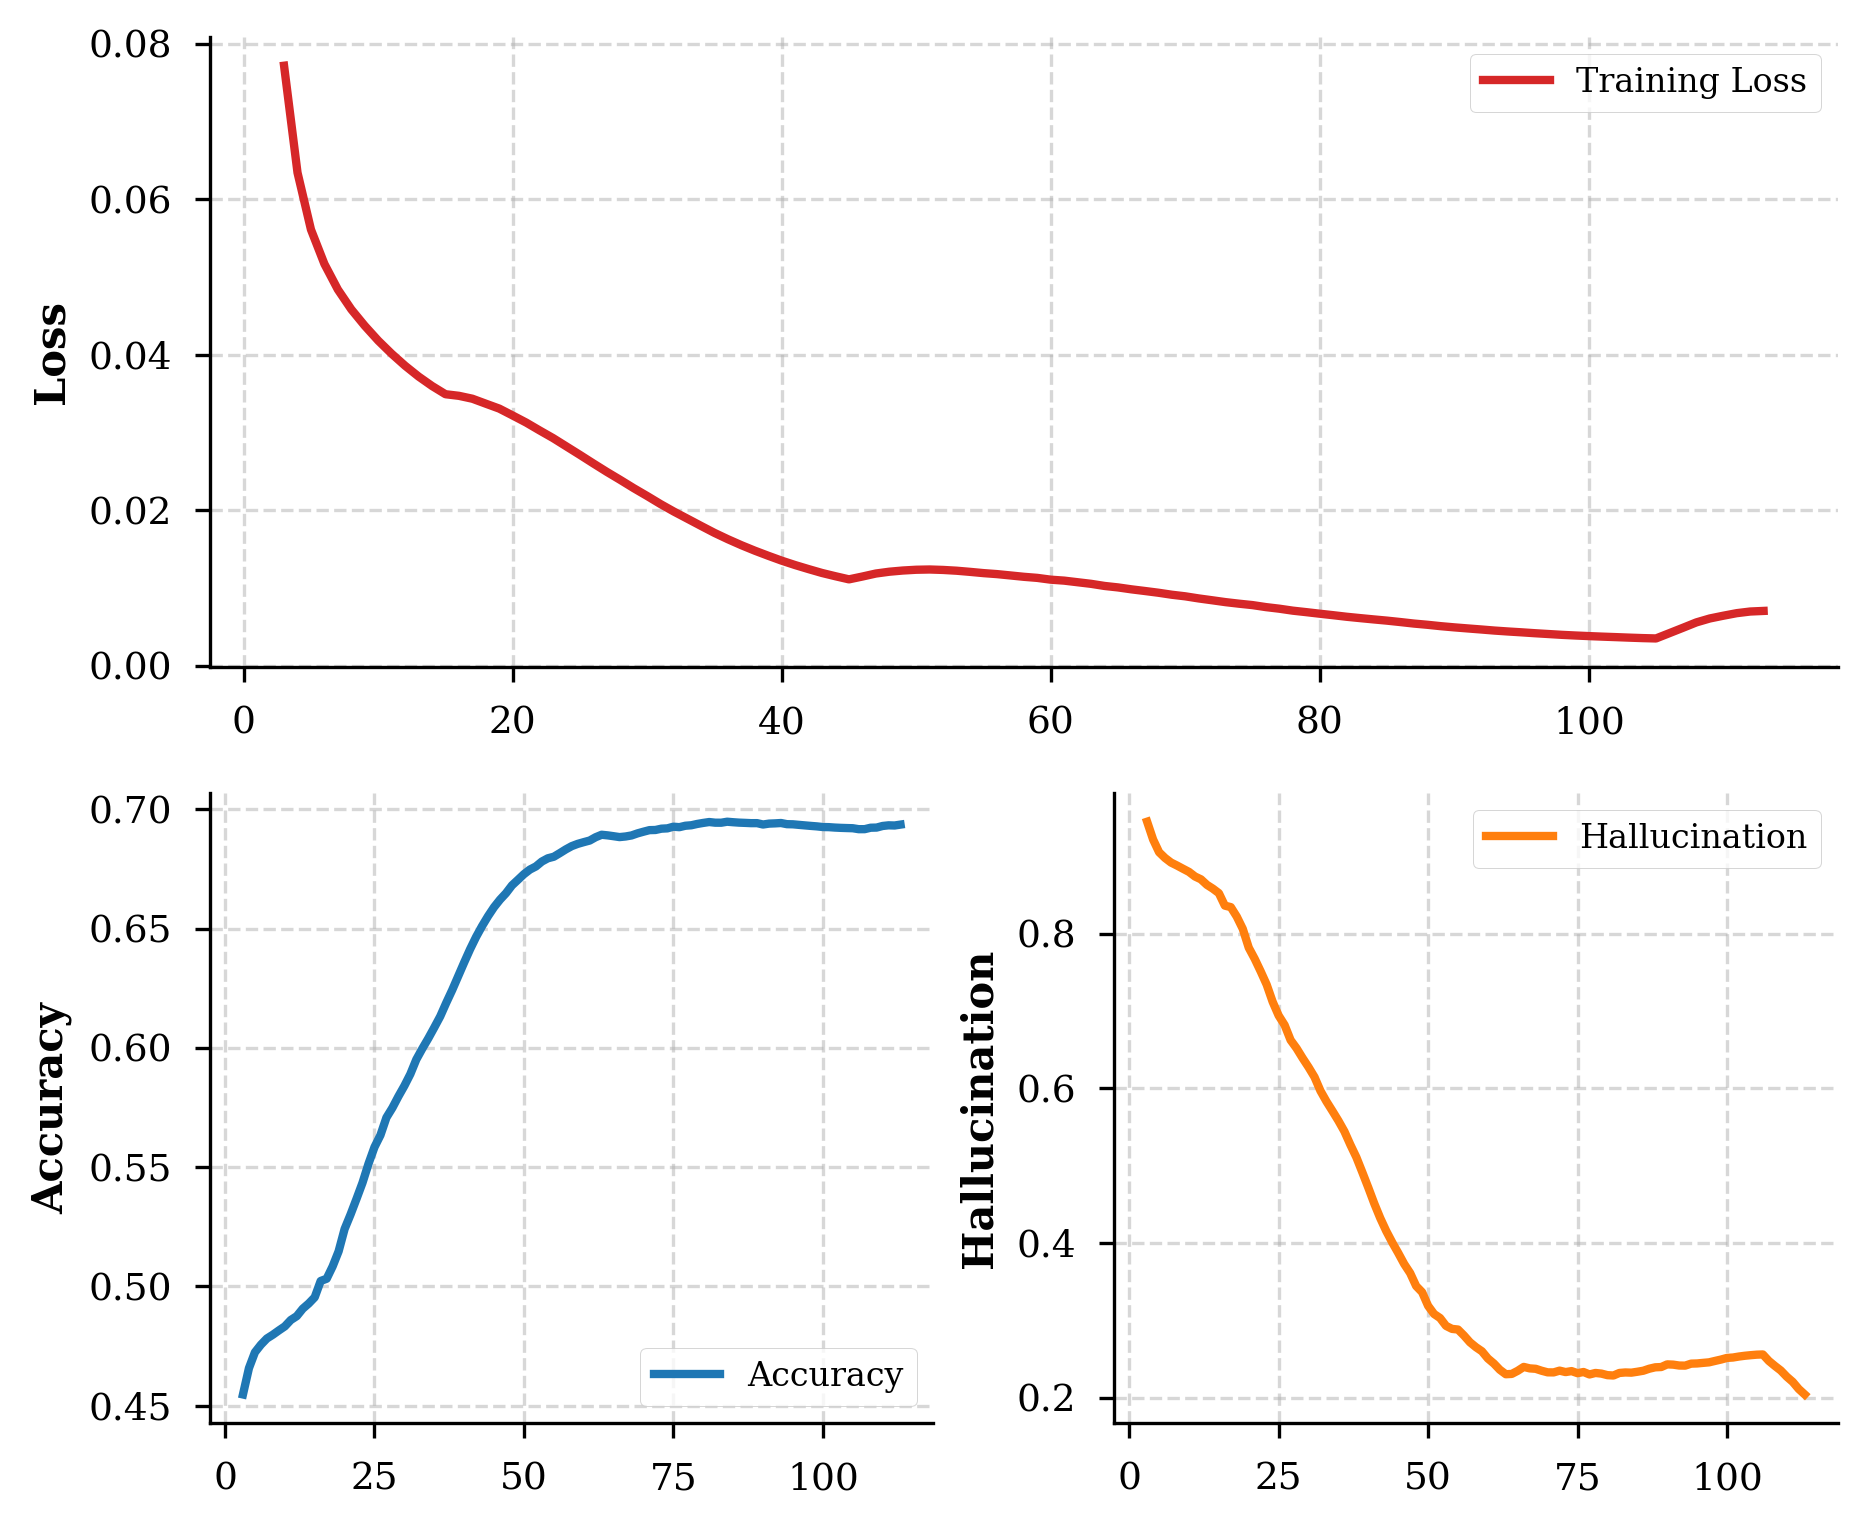

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import re

data_str = """
Epoch 003 | Loss: 0.0772 | Acc: 0.4547 | Hallu: 0.9446
Epoch 004 | Loss: 0.0510 | Acc: 0.4757 | Hallu: 0.9007
Epoch 005 | Loss: 0.0435 | Acc: 0.4838 | Hallu: 0.8769
Epoch 006 | Loss: 0.0408 | Acc: 0.4834 | Hallu: 0.8793
Epoch 007 | Loss: 0.0381 | Acc: 0.4863 | Hallu: 0.8733
Epoch 008 | Loss: 0.0363 | Acc: 0.4857 | Hallu: 0.8735
Epoch 009 | Loss: 0.0347 | Acc: 0.4892 | Hallu: 0.8660
Epoch 010 | Loss: 0.0327 | Acc: 0.4914 | Hallu: 0.8603
Epoch 011 | Loss: 0.0313 | Acc: 0.4999 | Hallu: 0.8428
Epoch 012 | Loss: 0.0299 | Acc: 0.4967 | Hallu: 0.8492
Epoch 013 | Loss: 0.0289 | Acc: 0.5093 | Hallu: 0.8202
Epoch 014 | Loss: 0.0283 | Acc: 0.5067 | Hallu: 0.8267
Epoch 015 | Loss: 0.0279 | Acc: 0.5127 | Hallu: 0.8135
Epoch 016 | Loss: 0.0333 | Acc: 0.5496 | Hallu: 0.7246
Epoch 017 | Loss: 0.0317 | Acc: 0.5099 | Hallu: 0.8204
Epoch 018 | Loss: 0.0290 | Acc: 0.5467 | Hallu: 0.7307
Epoch 019 | Loss: 0.0283 | Acc: 0.5626 | Hallu: 0.6864
Epoch 020 | Loss: 0.0253 | Acc: 0.5966 | Hallu: 0.5924
Epoch 021 | Loss: 0.0241 | Acc: 0.5787 | Hallu: 0.6525
Epoch 022 | Loss: 0.0221 | Acc: 0.5898 | Hallu: 0.6197
Epoch 023 | Loss: 0.0212 | Acc: 0.5989 | Hallu: 0.5934
Epoch 024 | Loss: 0.0192 | Acc: 0.6176 | Hallu: 0.5265
Epoch 025 | Loss: 0.0180 | Acc: 0.6174 | Hallu: 0.5443
Epoch 026 | Loss: 0.0166 | Acc: 0.6064 | Hallu: 0.5765
Epoch 027 | Loss: 0.0156 | Acc: 0.6345 | Hallu: 0.4942
Epoch 028 | Loss: 0.0149 | Acc: 0.6105 | Hallu: 0.5590
Epoch 029 | Loss: 0.0135 | Acc: 0.6216 | Hallu: 0.5286
Epoch 030 | Loss: 0.0129 | Acc: 0.6234 | Hallu: 0.5226
Epoch 031 | Loss: 0.0115 | Acc: 0.6330 | Hallu: 0.5000
Epoch 032 | Loss: 0.0111 | Acc: 0.6502 | Hallu: 0.4356
Epoch 033 | Loss: 0.0107 | Acc: 0.6407 | Hallu: 0.4594
Epoch 034 | Loss: 0.0097 | Acc: 0.6428 | Hallu: 0.4588
Epoch 035 | Loss: 0.0089 | Acc: 0.6501 | Hallu: 0.4431
Epoch 036 | Loss: 0.0088 | Acc: 0.6561 | Hallu: 0.4181
Epoch 037 | Loss: 0.0085 | Acc: 0.6708 | Hallu: 0.3681
Epoch 038 | Loss: 0.0083 | Acc: 0.6738 | Hallu: 0.3619
Epoch 039 | Loss: 0.0081 | Acc: 0.6835 | Hallu: 0.3113
Epoch 040 | Loss: 0.0077 | Acc: 0.6894 | Hallu: 0.2874
Epoch 041 | Loss: 0.0077 | Acc: 0.6933 | Hallu: 0.2595
Epoch 042 | Loss: 0.0076 | Acc: 0.6942 | Hallu: 0.2566
Epoch 043 | Loss: 0.0073 | Acc: 0.6936 | Hallu: 0.2598
Epoch 044 | Loss: 0.0076 | Acc: 0.6941 | Hallu: 0.2633
Epoch 045 | Loss: 0.0074 | Acc: 0.6942 | Hallu: 0.2597
Epoch 046 | Loss: 0.0149 | Acc: 0.6917 | Hallu: 0.2390
Epoch 047 | Loss: 0.0155 | Acc: 0.6902 | Hallu: 0.2504
Epoch 048 | Loss: 0.0143 | Acc: 0.6990 | Hallu: 0.1870
Epoch 049 | Loss: 0.0137 | Acc: 0.6924 | Hallu: 0.2612
Epoch 050 | Loss: 0.0133 | Acc: 0.6951 | Hallu: 0.1526
Epoch 051 | Loss: 0.0127 | Acc: 0.6930 | Hallu: 0.2087
Epoch 052 | Loss: 0.0118 | Acc: 0.6883 | Hallu: 0.2534
Epoch 053 | Loss: 0.0113 | Acc: 0.6976 | Hallu: 0.1970
Epoch 054 | Loss: 0.0107 | Acc: 0.6923 | Hallu: 0.2519
Epoch 055 | Loss: 0.0104 | Acc: 0.6864 | Hallu: 0.2801
Epoch 056 | Loss: 0.0106 | Acc: 0.6959 | Hallu: 0.2070
Epoch 057 | Loss: 0.0100 | Acc: 0.6980 | Hallu: 0.1889
Epoch 058 | Loss: 0.0098 | Acc: 0.6976 | Hallu: 0.2052
Epoch 059 | Loss: 0.0100 | Acc: 0.6945 | Hallu: 0.2096
Epoch 060 | Loss: 0.0089 | Acc: 0.6931 | Hallu: 0.1622
Epoch 061 | Loss: 0.0098 | Acc: 0.6933 | Hallu: 0.1822
Epoch 062 | Loss: 0.0088 | Acc: 0.7016 | Hallu: 0.1595
Epoch 063 | Loss: 0.0086 | Acc: 0.6991 | Hallu: 0.1753
Epoch 064 | Loss: 0.0077 | Acc: 0.6867 | Hallu: 0.2344
Epoch 065 | Loss: 0.0083 | Acc: 0.6854 | Hallu: 0.2730
Epoch 066 | Loss: 0.0075 | Acc: 0.6849 | Hallu: 0.2871
Epoch 067 | Loss: 0.0076 | Acc: 0.6910 | Hallu: 0.2197
Epoch 068 | Loss: 0.0073 | Acc: 0.6932 | Hallu: 0.2318
Epoch 069 | Loss: 0.0067 | Acc: 0.6982 | Hallu: 0.2107
Epoch 070 | Loss: 0.0070 | Acc: 0.6973 | Hallu: 0.2132
Epoch 071 | Loss: 0.0061 | Acc: 0.6975 | Hallu: 0.2317
Epoch 072 | Loss: 0.0062 | Acc: 0.6920 | Hallu: 0.2564
Epoch 073 | Loss: 0.0059 | Acc: 0.6971 | Hallu: 0.2153
Epoch 074 | Loss: 0.0061 | Acc: 0.6933 | Hallu: 0.2460
Epoch 075 | Loss: 0.0061 | Acc: 0.6994 | Hallu: 0.2061
Epoch 076 | Loss: 0.0051 | Acc: 0.6906 | Hallu: 0.2474
Epoch 077 | Loss: 0.0054 | Acc: 0.6988 | Hallu: 0.1998
Epoch 078 | Loss: 0.0047 | Acc: 0.6953 | Hallu: 0.2500
Epoch 079 | Loss: 0.0051 | Acc: 0.6992 | Hallu: 0.2230
Epoch 080 | Loss: 0.0048 | Acc: 0.6984 | Hallu: 0.2099
Epoch 081 | Loss: 0.0047 | Acc: 0.6982 | Hallu: 0.2242
Epoch 082 | Loss: 0.0044 | Acc: 0.6918 | Hallu: 0.2631
Epoch 083 | Loss: 0.0045 | Acc: 0.6943 | Hallu: 0.2385
Epoch 084 | Loss: 0.0044 | Acc: 0.6988 | Hallu: 0.2297
Epoch 085 | Loss: 0.0043 | Acc: 0.6926 | Hallu: 0.2444
Epoch 086 | Loss: 0.0039 | Acc: 0.6928 | Hallu: 0.2473
Epoch 087 | Loss: 0.0036 | Acc: 0.6934 | Hallu: 0.2620
Epoch 088 | Loss: 0.0038 | Acc: 0.6931 | Hallu: 0.2563
Epoch 089 | Loss: 0.0034 | Acc: 0.6943 | Hallu: 0.2428
Epoch 090 | Loss: 0.0035 | Acc: 0.6882 | Hallu: 0.2756
Epoch 091 | Loss: 0.0035 | Acc: 0.6976 | Hallu: 0.2393
Epoch 092 | Loss: 0.0034 | Acc: 0.6951 | Hallu: 0.2304
Epoch 093 | Loss: 0.0032 | Acc: 0.6957 | Hallu: 0.2400
Epoch 094 | Loss: 0.0033 | Acc: 0.6892 | Hallu: 0.2681
Epoch 095 | Loss: 0.0033 | Acc: 0.6932 | Hallu: 0.2465
Epoch 096 | Loss: 0.0031 | Acc: 0.6913 | Hallu: 0.2519
Epoch 097 | Loss: 0.0031 | Acc: 0.6912 | Hallu: 0.2522
Epoch 098 | Loss: 0.0030 | Acc: 0.6910 | Hallu: 0.2646
Epoch 099 | Loss: 0.0031 | Acc: 0.6910 | Hallu: 0.2660
Epoch 100 | Loss: 0.0031 | Acc: 0.6900 | Hallu: 0.2713
Epoch 101 | Loss: 0.0031 | Acc: 0.6921 | Hallu: 0.2566
Epoch 102 | Loss: 0.0031 | Acc: 0.6907 | Hallu: 0.2652
Epoch 103 | Loss: 0.0030 | Acc: 0.6911 | Hallu: 0.2636
Epoch 104 | Loss: 0.0030 | Acc: 0.6914 | Hallu: 0.2620
Epoch 105 | Loss: 0.0031 | Acc: 0.6914 | Hallu: 0.2616
Epoch 106 | Loss: 0.0107 | Acc: 0.6879 | Hallu: 0.2582
Epoch 107 | Loss: 0.0114 | Acc: 0.6918 | Hallu: 0.1677
Epoch 108 | Loss: 0.0122 | Acc: 0.6980 | Hallu: 0.1804
Epoch 109 | Loss: 0.0109 | Acc: 0.6930 | Hallu: 0.1779
Epoch 110 | Loss: 0.0098 | Acc: 0.6994 | Hallu: 0.1509
Epoch 111 | Loss: 0.0099 | Acc: 0.6959 | Hallu: 0.1563
Epoch 112 | Loss: 0.0090 | Acc: 0.6926 | Hallu: 0.1240
Epoch 113 | Loss: 0.0078 | Acc: 0.6972 | Hallu: 0.1369
"""

# Parsing logic
pattern = r"Epoch (\d+) \| Loss: ([\d.]+) \| Acc: ([\d.]+) \| Hallu: ([\d.]+)"
matches = re.findall(pattern, data_str)
df = pd.DataFrame(matches, columns=['Epoch', 'Loss', 'Acc', 'Hallu']).astype(float)

# Smoothing
df['Loss_smooth'] = df['Loss'].ewm(span=20).mean()
df['Acc_smooth'] = df['Acc'].ewm(span=20).mean()
df['Hallu_smooth'] = df['Hallu'].ewm(span=20).mean()

# Settings for professional look
plt.style.use('seaborn-v0_8-paper')
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "DejaVu Serif"],
    "axes.labelsize": 10,
    "font.size": 10,
    "legend.fontsize": 8,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
})

# Layout: Loss on top, Acc and Hallu bottom side-by-side
fig = plt.figure(figsize=(7, 6), dpi=300)
gs = fig.add_gridspec(2, 2, hspace=0.2, wspace=0.25)

# Loss Plot (Top Row, Spans both columns)
ax1 = fig.add_subplot(gs[0, :])
# ax1.plot(df['Epoch'], df['Loss'], color='#d62728', alpha=0.2, linewidth=1)
ax1.plot(df['Epoch'], df['Loss_smooth'], color='#d62728', linewidth=2, label='Training Loss')
ax1.set_ylabel('Loss', fontweight='bold')
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.legend(loc='upper right')

# Accuracy Plot (Bottom Left)
ax2 = fig.add_subplot(gs[1, 0])
# ax2.plot(df['Epoch'], df['Acc'], color='#1f77b4', alpha=0.2, linewidth=1)
ax2.plot(df['Epoch'], df['Acc_smooth'], color='#1f77b4', linewidth=2, label='Accuracy')
ax2.set_ylabel('Accuracy', fontweight='bold')
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.legend(loc='lower right')

# Hallucination Plot (Bottom Right)
ax3 = fig.add_subplot(gs[1, 1])
# ax3.plot(df['Epoch'], df['Hallu'], color='#ff7f0e', alpha=0.2, linewidth=1)
ax3.plot(df['Epoch'], df['Hallu_smooth'], color='#ff7f0e', linewidth=2, label='Hallucination')
ax3.set_ylabel('Hallucination', fontweight='bold')
ax3.grid(True, linestyle='--', alpha=0.5)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.legend(loc='upper right')

# Save files

# # Save in high-res PDF (best for papers) and PNG
plt.savefig("figures/convergence.pdf", dpi=1600, bbox_inches='tight', format='pdf')
plt.show()